<a href="https://colab.research.google.com/github/TiagoBem/PredictionModel/blob/main/AnaliseDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DL_bitrate_N-1    0.931736
UL_bitrate        0.917947
DL_bitrate_N-2    0.889073
DL_bitrate_N-3    0.857879
UL_bitrate_N-1    0.852557
DL_bitrate_N-4    0.833891
UL_bitrate_N-2    0.812630
UL_bitrate_N-3    0.782842
UL_bitrate_N-4    0.759670
Name: DL_bitrate, dtype: float64


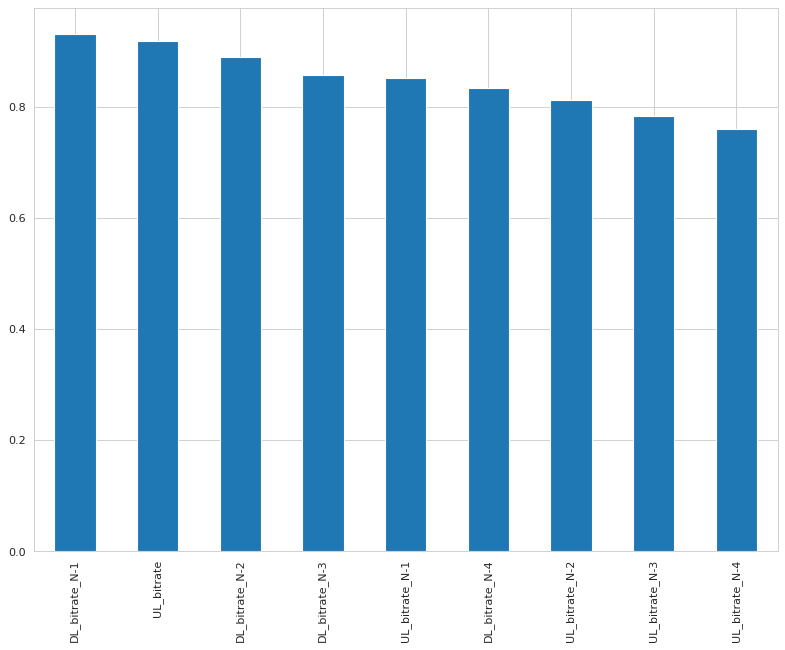

DL_bitrate        0.917947
UL_bitrate_N-1    0.882484
DL_bitrate_N-1    0.855307
UL_bitrate_N-2    0.833432
DL_bitrate_N-2    0.815569
UL_bitrate_N-3    0.795630
DL_bitrate_N-3    0.784659
UL_bitrate_N-4    0.769658
DL_bitrate_N-4    0.760516
Name: UL_bitrate, dtype: float64


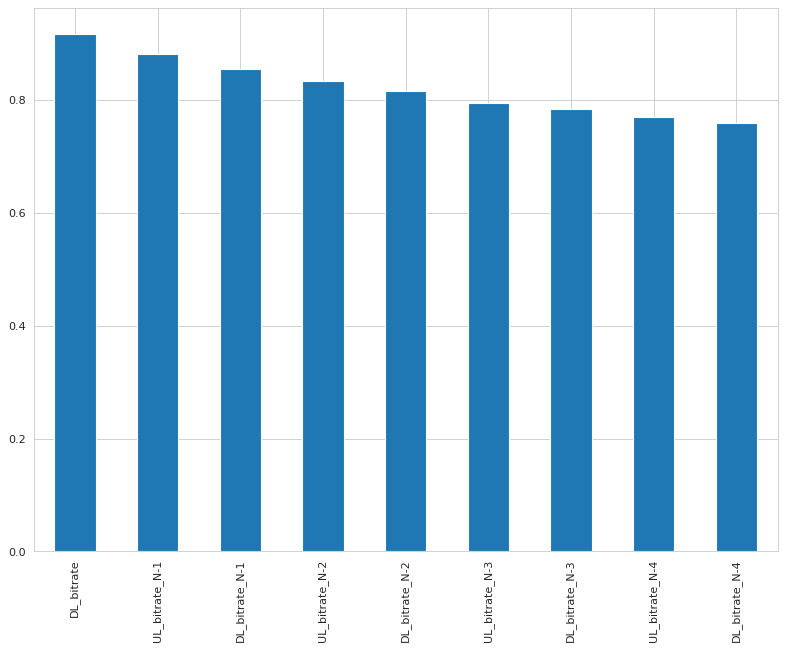

-23
4


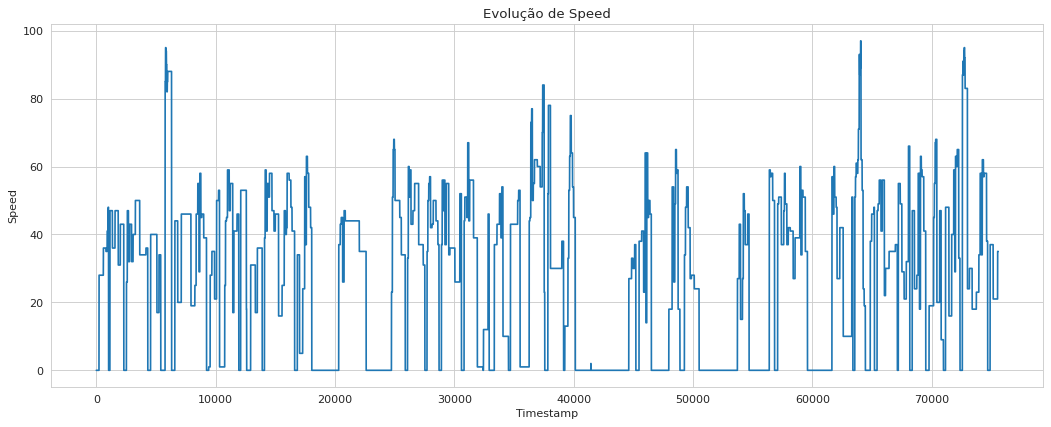

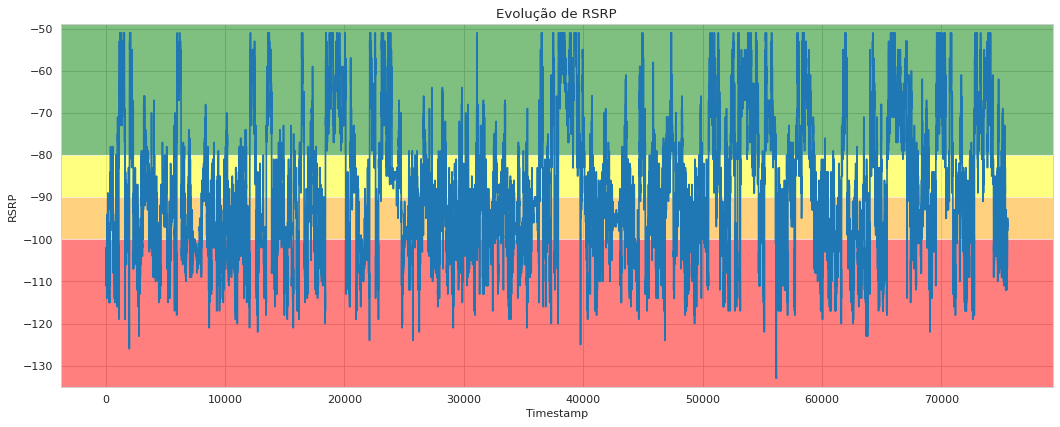

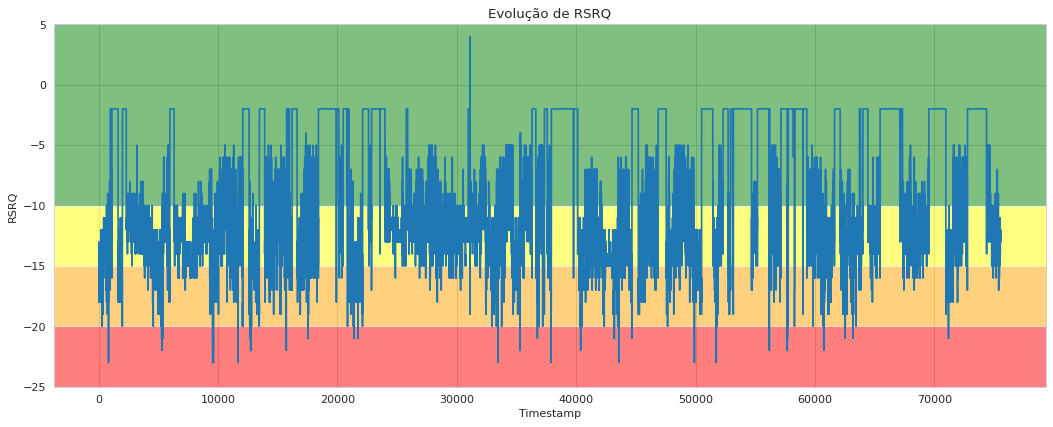

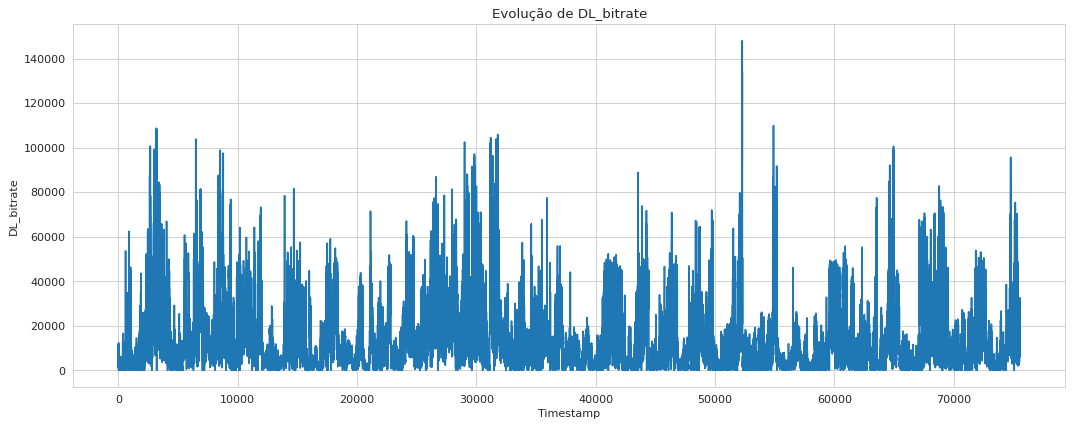

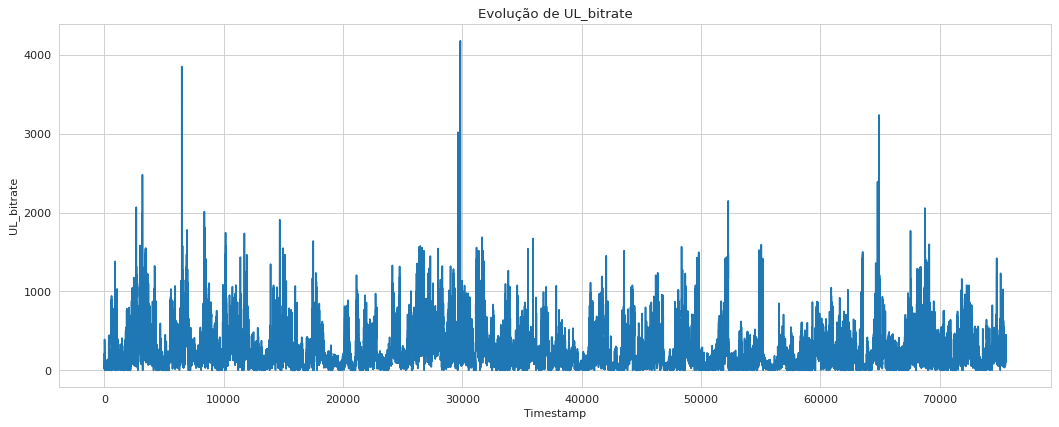

Máxima diferença entre Timestamps:  10.0
Mínima diferença entre Timestamps:  0.0
DL_bitrate maximo:  147930
DL_bitrate minimo:  0
DL_bitrate médio:  13868.302711501052
Variância do dataset:  210893332.78877372
Desvio padrão do dataset:  14522.166945355424


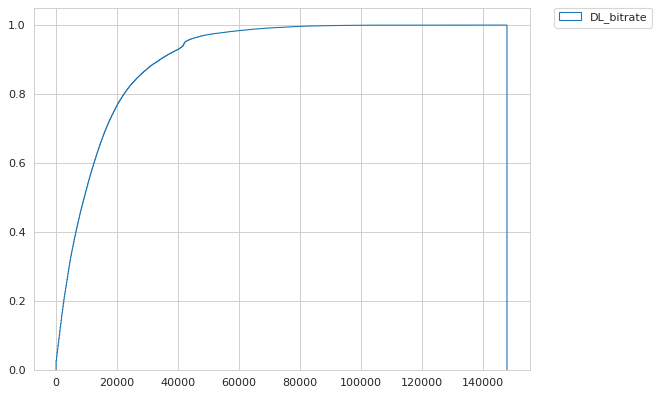

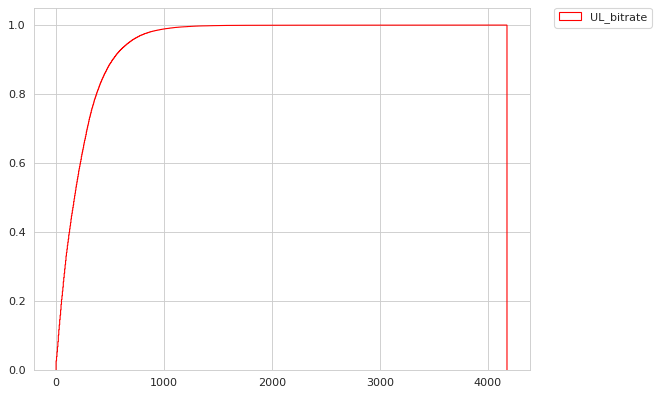

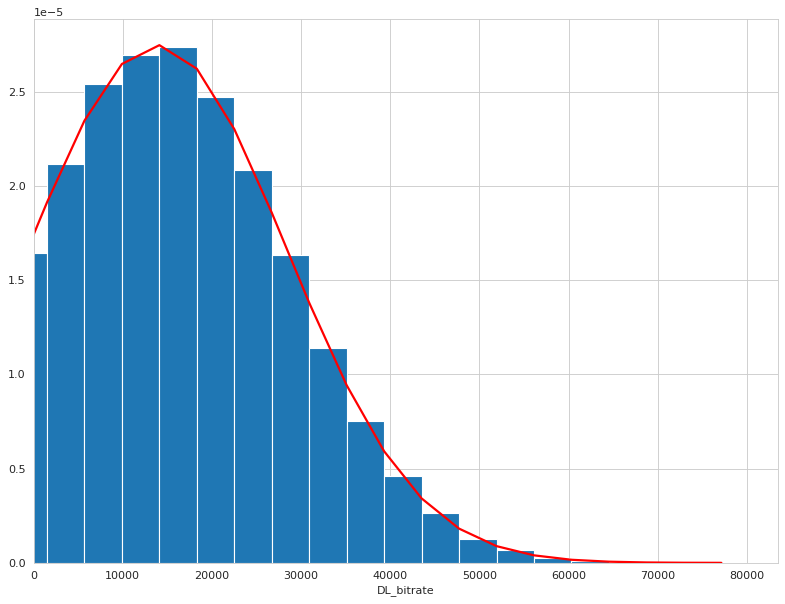

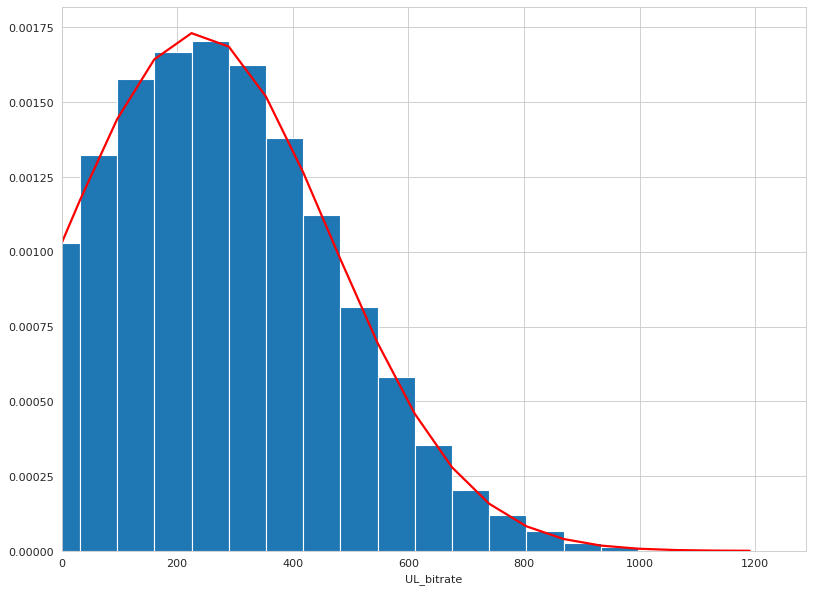

Maior quebra de DL_bitrate na linha 52282: 55059.0 DL_bitrate_N-1: 133950.0  DL_bitrate: 78891
Maior subida de DL_bitrate na linha 29617: 64118.0 DL_bitrate_N-1: 0.0  DL_bitrate: 64118


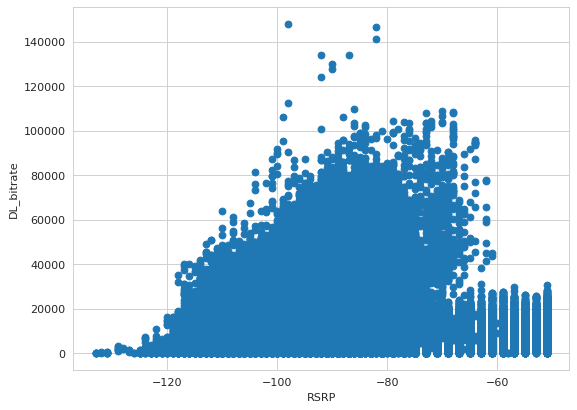

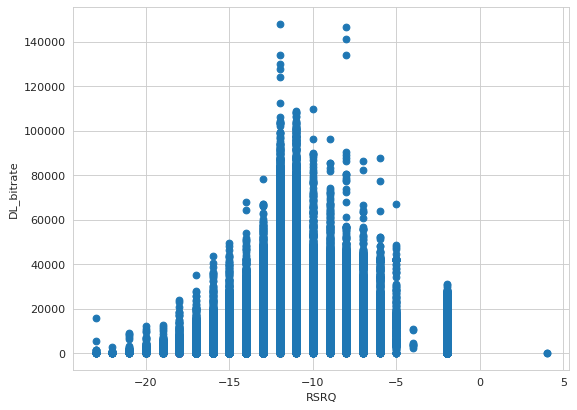

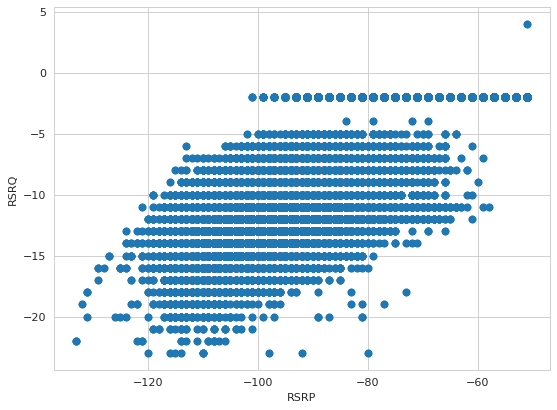

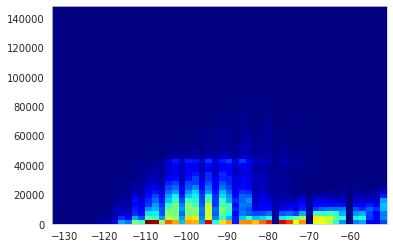

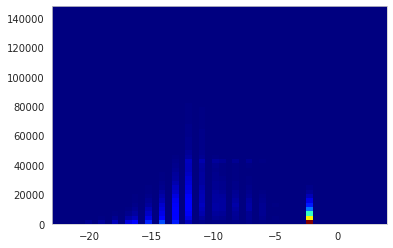

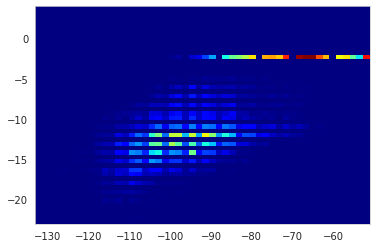

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


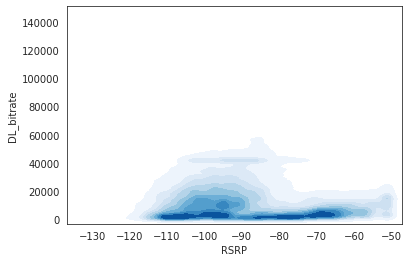

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


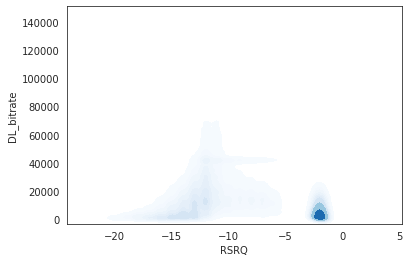

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


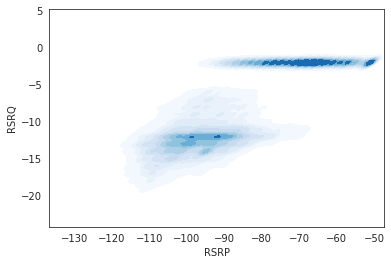

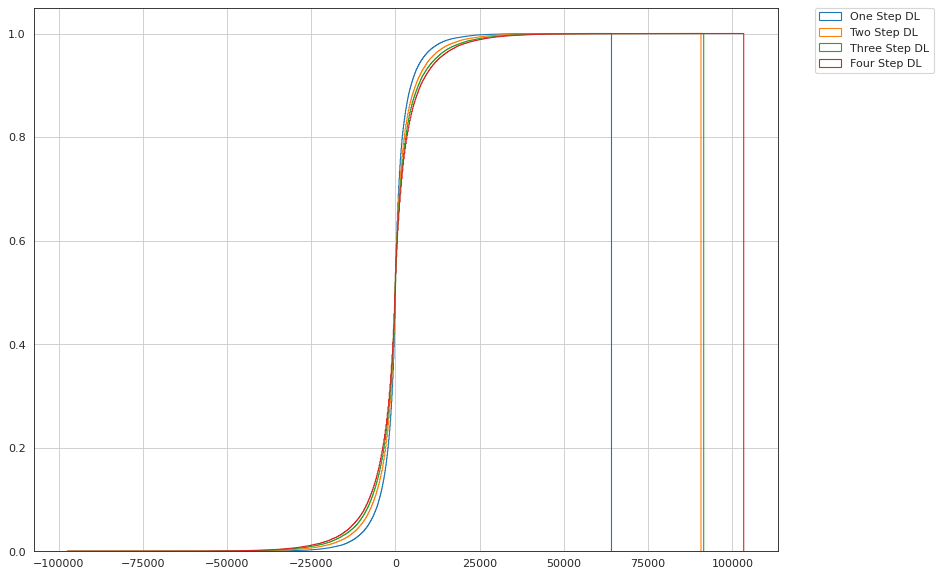

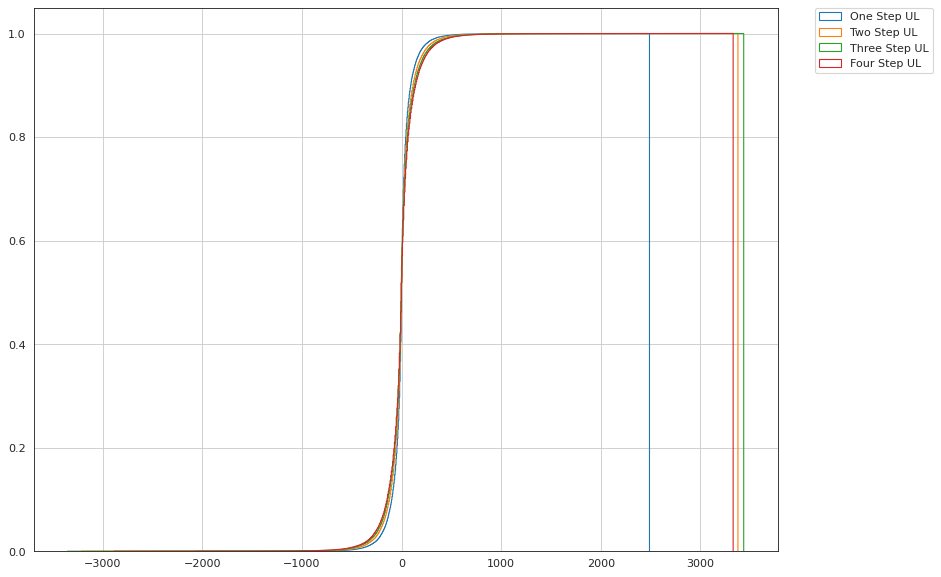

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('NewDataset.csv')
dataset = dataset.dropna()
dataset = dataset.loc[:,~dataset.columns.str.match("Unnamed")]

# correlacoes
correlationsDL = dataset.corr().loc['DL_bitrate'].transpose()
correlationsDL.pop('DL_bitrate')
correlationsDL = correlationsDL[correlationsDL > 0.6]
correlationsDL = correlationsDL.sort_values(ascending=False)
print(correlationsDL)

labels = correlationsDL.index
x_pos = np.arange(len(labels))

plt.figure(figsize=(12,9), dpi=80)
correlationsDL.plot(kind='bar')
plt.xticks(x_pos,labels)
plt.show()

correlationsUL = dataset.corr().loc['UL_bitrate'].transpose()
correlationsUL.pop('UL_bitrate')
correlationsUL = correlationsUL[correlationsUL > 0.6]
correlationsUL = correlationsUL.sort_values(ascending=False)
print(correlationsUL)

labels = correlationsUL.index
x_pos = np.arange(len(labels))

plt.figure(figsize=(12,9), dpi=80)
correlationsUL.plot(kind='bar')
plt.xticks(x_pos,labels)
plt.show()
print(min(dataset['RSRQ']))
print(max(dataset['RSRQ']))

# evolucao de cada feature
for i in range(3,7):
  column = dataset.columns[i]
  plt.figure(figsize=(16, 6), dpi=80)
  plt.plot(dataset[column])
  plt.title('Evolução de ' + str(column))
  plt.ylabel(column)
  plt.xlabel('Timestamp')
  if column == 'RSRP':
    plt.axhspan(-49, -80, facecolor='green', alpha=0.5)
    plt.axhspan(-80, -90, facecolor='yellow', alpha=0.5)
    plt.axhspan(-90, -100, facecolor='orange', alpha=0.5)
    plt.axhspan(-100, -140, facecolor='red', alpha=0.5)
    plt.ylim([-135,-49])
  elif column == 'RSRQ':
    plt.axhspan(5, -10, facecolor='green', alpha=0.5)
    plt.axhspan(-10, -15, facecolor='yellow', alpha=0.5)
    plt.axhspan(-15, -20, facecolor='orange', alpha=0.5)
    plt.axhspan(-20, -25, facecolor='red', alpha=0.5)
    plt.ylim([-25,5])
  plt.show()

plt.figure(figsize=(16,6), dpi=80)
plt.plot(dataset['UL_bitrate'])
plt.title('Evolução de UL_bitrate')
plt.ylabel('UL_bitrate')
plt.xlabel('Timestamp')
plt.show()

print("Máxima diferença entre Timestamps: ", max(dataset['TimeDiff']))
print("Mínima diferença entre Timestamps: ", min(dataset['TimeDiff']))

# media de throughput
print("DL_bitrate maximo: ",max(dataset['DL_bitrate']))
print("DL_bitrate minimo: ",min(dataset['DL_bitrate']))
print("DL_bitrate médio: ",dataset['DL_bitrate'].mean())

# Variância
import statistics
print("Variância do dataset: ",statistics.variance(dataset['DL_bitrate']))

# desvio padrão
print("Desvio padrão do dataset: ",statistics.stdev(dataset['DL_bitrate']))

# CDF
plt.figure(figsize=(8, 6), dpi=80)
dataset['DL_bitrate'].hist(cumulative=True, density=1, histtype='step', bins=1000, label='DL_bitrate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

plt.figure(figsize=(8, 6), dpi=80)
dataset['UL_bitrate'].hist(cumulative=True, density=1, histtype='step', bins=1000, label='UL_bitrate', color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


# Normal distribution
import seaborn as sb

mean_DL = np.mean(dataset['DL_bitrate'])
std_DL = np.std(dataset['DL_bitrate'])
ND_DL = np.random.normal(mean_DL, std_DL, 75567)
#percentage_DL = np.linspace(mean_DL, std_DL, 75567)

sb.set_style('whitegrid')
plt.figure(figsize=(12, 9), dpi=80)
count, bins, ignored = plt.hist(ND_DL, 30, density=True)
plt.plot(bins, 1/(std_DL * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean_DL)**2 / (2 * std_DL**2) ),
         linewidth=2, color='r')
plt.xlabel('DL_bitrate')
plt.xlim(left=0)
plt.show()

mean_UL = np.mean(dataset['UL_bitrate'])
std_UL = np.std(dataset['UL_bitrate'])
ND_UL = np.random.normal(mean_UL, std_UL, 75567)
#percentage_UL = np.linspace(mean_UL, std_UL, 75567)

sb.set_style('whitegrid')
plt.figure(figsize=(12, 9), dpi=80)
count, bins, ignored = plt.hist(ND_UL, 30, density=True)
plt.plot(bins, 1/(std_UL * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean_UL)**2 / (2 * std_UL**2) ),
         linewidth=2, color='r')
plt.xlabel('UL_bitrate')
plt.xlim(left=0)
plt.show()

# timestamp com maior quebra de DL_bitrate
def biggest_drop():
  max = 0
  max_row = 0
  for row in dataset.index:
    aux = dataset['DL_bitrate_N-1'][row] - dataset['DL_bitrate'][row]
    if aux > max:
      max = aux
      max_row = row
  return max_row

drop = biggest_drop()
print("Maior quebra de DL_bitrate na linha " + str(drop) + ": " + str(dataset['DL_bitrate_N-1'][drop] - dataset['DL_bitrate'][drop]) + " DL_bitrate_N-1: " + str(dataset['DL_bitrate_N-1'][drop]) + "  DL_bitrate: " + str(dataset['DL_bitrate'][drop]))


# timestamp com maior subida de DL_bitrate
def biggest_raise():
  max = 0
  max_row = 0
  for row in dataset.index:
    aux = dataset['DL_bitrate'][row] - dataset['DL_bitrate_N-1'][row]
    if aux > max:
      max = aux
      max_row = row
  return max_row

increase = biggest_raise()
print("Maior subida de DL_bitrate na linha " + str(increase) + ": " + str(dataset['DL_bitrate'][increase] - dataset['DL_bitrate_N-1'][increase]) + " DL_bitrate_N-1: " + str(dataset['DL_bitrate_N-1'][increase]) + "  DL_bitrate: " + str(dataset['DL_bitrate'][increase]))


# scatter plots

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(dataset['RSRP'], dataset['DL_bitrate'])
plt.xlabel('RSRP')
plt.ylabel('DL_bitrate')
plt.show()

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(dataset['RSRQ'], dataset['DL_bitrate'])
plt.xlabel('RSRQ')
plt.ylabel('DL_bitrate')
plt.show()

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(dataset['RSRP'], dataset['RSRQ'])
plt.xlabel('RSRP')
plt.ylabel('RSRQ')
plt.show()


# 2d hist
plt.hist2d(dataset['RSRP'], dataset['DL_bitrate'], bins=(50, 50), cmap=plt.cm.jet)
plt.show()
plt.hist2d(dataset['RSRQ'], dataset['DL_bitrate'], bins=(50, 50), cmap=plt.cm.jet)
plt.show()
plt.hist2d(dataset['RSRP'], dataset['RSRQ'], bins=(50, 50), cmap=plt.cm.jet)
plt.show()


# Countors

import seaborn as sns

sns.set_style("white")
sns.kdeplot(dataset['RSRP'], dataset['DL_bitrate'], cmap="Blues", shade=True, bw_adjust=.5)
plt.show()
sns.kdeplot(dataset['RSRQ'], dataset['DL_bitrate'], cmap="Blues", shade=True, bw_adjust=.5)
plt.show()
sns.kdeplot(dataset['RSRP'], dataset['RSRQ'], cmap="Blues", shade=True, bw_adjust=.5)
plt.show()


# Throughput differences

DL_1step = dataset['DL_bitrate'] - dataset['DL_bitrate_N-1']
DL_2step = dataset['DL_bitrate'] - dataset['DL_bitrate_N-2']
DL_3step = dataset['DL_bitrate'] - dataset['DL_bitrate_N-3']
DL_4step = dataset['DL_bitrate'] - dataset['DL_bitrate_N-4']

plt.figure(figsize=(12, 9), dpi=80)
DL_1step.hist(cumulative=True, density=1, histtype='step', bins=1000, label='One Step DL')
DL_2step.hist(cumulative=True, density=1, histtype='step', bins=1000, label='Two Step DL')
DL_3step.hist(cumulative=True, density=1, histtype='step', bins=1000, label='Three Step DL')
DL_4step.hist(cumulative=True, density=1, histtype='step', bins=1000, label='Four Step DL')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


UL_1step = dataset['UL_bitrate'] - dataset['UL_bitrate_N-1']
UL_2step = dataset['UL_bitrate'] - dataset['UL_bitrate_N-2']
UL_3step = dataset['UL_bitrate'] - dataset['UL_bitrate_N-3']
UL_4step = dataset['UL_bitrate'] - dataset['UL_bitrate_N-4']

plt.figure(figsize=(12, 9), dpi=80)
UL_1step.hist(cumulative=True, density=1, histtype='step', bins=1000, label='One Step UL')
UL_2step.hist(cumulative=True, density=1, histtype='step', bins=1000, label='Two Step UL')
UL_3step.hist(cumulative=True, density=1, histtype='step', bins=1000, label='Three Step UL')
UL_4step.hist(cumulative=True, density=1, histtype='step', bins=1000, label='Four Step UL')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()